In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel("data.xlsx")
df = df.drop('№', axis = 1)
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8
0,6,150,1.8,24,30,120,3.4,15
1,7,150,1.8,24,30,120,9.7,5
2,6,170,1.8,24,30,120,7.4,23
3,7,170,1.8,24,30,120,10.6,8
4,6,150,2.4,24,30,120,6.5,20


In [3]:
# Нормалізація даних
data_norm = (df - df.mean()) / df.std()
data_norm.head()

,X1,X2,X3,X4,X5,X6,X7,X8
0,-0.991031,-0.991031,-0.991031,-0.858258,-0.858258,-0.858258,-2.605167,-0.081459
1,0.991031,-0.991031,-0.991031,-0.858258,-0.858258,-0.858258,-0.358521,-1.194072
2,-0.991031,0.991031,-0.991031,-0.858258,-0.858258,-0.858258,-1.178725,0.808631
3,0.991031,0.991031,-0.991031,-0.858258,-0.858258,-0.858258,-0.037571,-0.860288
4,-0.991031,-0.991031,0.991031,-0.858258,-0.858258,-0.858258,-1.499674,0.474847


In [4]:
# Визначення кількості кластерів
k = 4
# Створення моделі k-середніх
kmeans = KMeans(n_clusters=k, n_init=10)

# Навчання моделі на нормалізованих даних
kmeans.fit(data_norm)

# Передбачення кластерів для даних
labels = kmeans.predict(data_norm)
labels

array([1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 0, 0, 0, 1, 3, 0, 0, 3, 3, 3, 3,
       3, 3, 3, 3, 0, 0, 0, 0, 1, 0, 0, 0], dtype=int32)

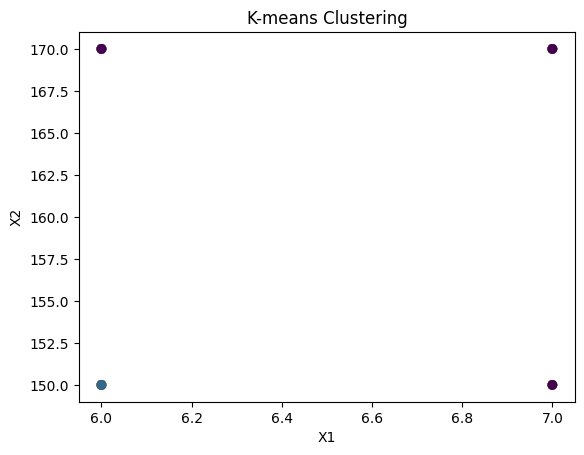

In [5]:
# Відображення кластерів на графіку
#plt.scatter(df['X1'], df['X2'], c=labels)
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=labels)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('K-means Clustering')
plt.show()

In [6]:
import numpy as np
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler


# Відокремлюємо ознаки
X = df.iloc[:, 1:].values

# Нормалізація даних
scaler = StandardScaler()
X = scaler.fit_transform(X)


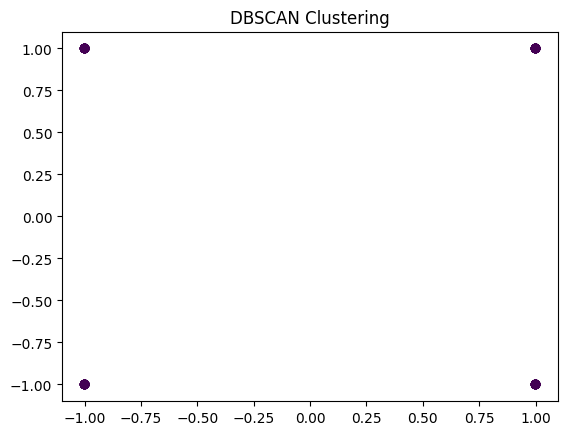

In [7]:
# Кластеризація даних з використанням алгоритму DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X)
labels = dbscan.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

# Відображення результатів кластеризації
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.title("DBSCAN Clustering")
plt.show()

In [8]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

n_clusters = 5

# створення об'єкту алгоритму
krab = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')

# виконання кластеризації
labels = krab.fit_predict(df)

# оцінка якості кластеризації за допомогою коефіцієнту силуету
silhouette_avg = silhouette_score(df, labels)

# вивід результатів
print('Number of clusters:', n_clusters)
print('Silhouette score:', silhouette_avg)
print('Cluster labels:', labels)

Number of clusters: 5
Silhouette score: 0.26492677239010104
Cluster labels: [4 4 3 1 4 4 1 1 2 2 1 1 2 2 1 1 0 4 1 1 0 4 1 1 2 2 1 1 0 2 1 1 0 4 3 3 0
 0 3 3 0 2 3 3 2 2 3 3 0 0 3 3 0 0 3 1]


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [17]:
E99 = pd.read_excel("E1999.xlsx")
E99 = E99.drop('E1999', axis = 1)
E99.head()

,Х1,Х2,Х3,Х4,Х5,Х6,Х7,Х8,Х9,Х10,...,Х16,Х17,Х18,Х19,Х20,Х21,Х22,Х23,Х24,Х25
0,573.40,15.43,0.42,31.04,34.24,34.34,123.66,41.24,2.44,0.71,...,86.71,121.94,8.34,79.88,2.43,2.22,2.94,15.56,0.12,26563.21
1,1038.90,82.79,1.85,43.03,97.33,45.15,136.92,78.73,3.00,0.66,...,48.68,127.93,1.46,82.73,4.20,2.37,5.51,72.67,0.17,24886.87
2,485.38,6.23,1.25,18.34,28.72,18.61,14.98,9.73,0.34,0.35,...,28.81,16.30,0.31,20.44,0.11,1.09,0.62,5.34,1.01,1611.13
3,1014.40,47.53,2.06,39.69,32.01,15.34,235.63,73.85,3.94,0.81,...,153.05,163.61,0.44,146.71,6.39,1.56,27.34,71.09,0.65,14236.94
4,417.60,18.55,1.38,5.74,18.67,19.98,52.88,15.75,1.18,0.39,...,59.21,58.79,1.51,52.27,1.12,1.83,2.27,18.98,0.16,6044.98


In [18]:
E11 = pd.read_excel("E2011.xlsx")
E11 = E11.drop('E2011', axis = 1)
E11.head()

,Х1,Х2,Х3,Х4,Х5,Х6,Х7,Х8,Х9,Х10,...,Х18,Х19,Х20,Х21,Х22,Х23,Х24,Х25,Х26,Х27
0,409.300003,9.088608,0.00,0.000000,0.00000,0.00,85.785795,84.93,1.19,0.28,...,4.68,54.20427,0.400,1.283,5.250000,7.272513,0.111940,16534.220527,8.0,5.7
1,1894.999996,126.514100,0.66,12.316020,58.63303,116.80,212.665381,139.17,5.60,0.83,...,4.94,122.98967,8.981,2.744,95.784000,118.745036,0.319439,38960.757926,10.0,8.0
2,1531.700006,20.457170,3.60,6.023267,18.23202,74.02,326.130606,247.47,7.41,1.66,...,0.74,249.99010,2.165,2.071,54.127572,11.416486,1.047858,29371.999950,8.0,6.3
3,844.600000,18.477950,0.60,47.967390,33.80901,78.75,135.337934,64.46,3.36,0.72,...,7.52,94.10753,2.319,2.290,4.917000,19.722870,0.086709,49581.464833,5.0,5.0
4,1248.500002,50.510600,0.14,54.154700,59.09741,73.37,116.812755,95.59,3.26,0.76,...,2.08,105.21000,5.401,2.193,4.244000,44.738805,0.143532,46512.889902,8.0,7.0


In [19]:
E06 = pd.read_excel("E2006.xlsx")
E06 = E06.drop('E2006', axis = 1)
E06.head()

,Х1,Х2,Х3,Х4,Х5,Х6,Х7,Х8,Х9,Х10,...,Х18,Х19,Х20,Х21,Х22,Х23,Х24,Х25,Х26,Х27
0,791.099998,48.72329,3.630000,41.619820,29.451380,83.980000,129.624830,89.06,3.04,0.68,...,8.31,86.66881,2.773,2.377,4.941000,58.869883,0.116101,39299.614300,5.000000,5.0
1,1202.699995,86.00990,0.730000,23.541160,60.885450,91.330000,108.604926,134.30,3.53,0.72,...,1.55,97.95182,6.429,2.223,4.221000,99.063558,0.145052,37918.773198,8.000000,7.0
2,432.100002,23.13812,0.836866,25.530940,24.769158,44.555761,40.730325,59.53,0.84,0.28,...,0.64,44.09669,0.340,1.992,2.940000,31.090732,0.450707,4313.430636,10.000000,6.0
3,1292.600002,60.58722,6.510000,8.663857,35.710660,28.750000,204.334353,201.08,6.22,1.53,...,0.55,176.17560,2.003,1.928,37.230173,86.246018,1.345071,23863.555474,4.700402,5.0
4,398.199999,30.41693,0.130000,7.140176,21.385420,47.786286,46.659651,83.36,0.99,0.38,...,1.71,59.88101,1.463,2.100,4.516000,32.764314,0.028240,14445.725278,2.000000,5.0


In [21]:
# Нормалізація даних
E99_norm = (E99 - E99.mean()) / E99.std()
E06_norm = (E06 - E06.mean()) / E06.std()
E11_norm = (E11 - E11.mean()) / E11.std()

In [30]:
# Визначення кількості кластерів
n = 3
m = 4
i = 5
# Створення моделі середніх
nmeans = KMeans(n_clusters=n, n_init=10)
mmeans = KMeans(n_clusters=m, n_init=10)
imeans = KMeans(n_clusters=i, n_init=10)
# Навчання моделі на нормалізованих даних
nmeans.fit(E99_norm)
mmeans.fit(E99_norm)
imeans.fit(E99_norm)
# Передбачення кластерів для даних
nlabels = nmeans.predict(E99_norm)
mlabels = mmeans.predict(E99_norm)
ilabels = imeans.predict(E99_norm)
print(nlabels)
print(mlabels)
print(ilabels)

[1 1 0 1 0 1 0 1 1 1 1 0 1 1 0 0 2 1 1 0 1 0 0 0 1 1 1]
[0 0 1 0 1 0 1 3 0 0 0 1 0 0 1 1 2 0 3 1 0 1 1 1 0 3 3]
[0 4 1 2 1 0 1 4 0 0 0 1 0 0 1 1 3 2 4 1 0 1 1 1 0 4 4]


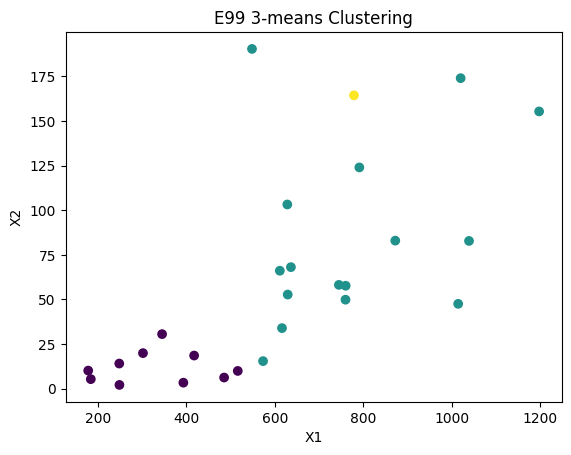

In [34]:
# Відображення кластерів на графіку
#plt.scatter(df['X1'], df['X2'], c=labels)
plt.scatter(E99.iloc[:, 0], E99.iloc[:, 1], c=nlabels)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('E99 3-means Clustering')
plt.show()

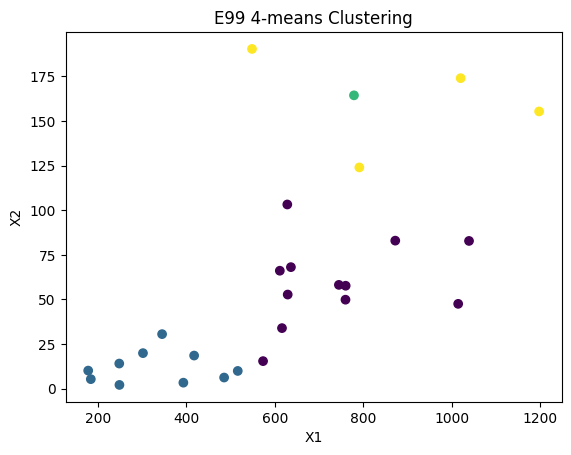

In [35]:
# Відображення кластерів на графіку
#plt.scatter(df['X1'], df['X2'], c=labels)
plt.scatter(E99.iloc[:, 0], E99.iloc[:, 1], c=mlabels)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('E99 4-means Clustering')
plt.show()

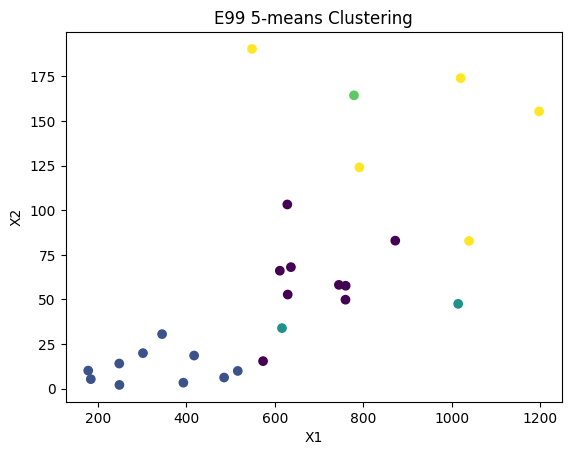

In [36]:
# Відображення кластерів на графіку
#plt.scatter(df['X1'], df['X2'], c=labels)
plt.scatter(E99.iloc[:, 0], E99.iloc[:, 1], c=ilabels)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('E99 5-means Clustering')
plt.show()

In [37]:
# Визначення кількості кластерів
n = 3
m = 4
i = 5
# Створення моделі середніх
nmeans = KMeans(n_clusters=n, n_init=10)
mmeans = KMeans(n_clusters=m, n_init=10)
imeans = KMeans(n_clusters=i, n_init=10)
# Навчання моделі на нормалізованих даних
nmeans.fit(E06_norm)
mmeans.fit(E06_norm)
imeans.fit(E06_norm)
# Передбачення кластерів для даних
nlabels = nmeans.predict(E06_norm)
mlabels = mmeans.predict(E06_norm)
ilabels = imeans.predict(E06_norm)
print(nlabels)
print(mlabels)
print(ilabels)

[2 2 0 2 0 2 0 0 2 2 0 0 2 2 0 0 1 2 2 0 2 0 0 0 2 2 2]
[0 3 1 0 1 3 1 3 3 0 0 1 3 0 1 1 2 0 0 1 0 1 1 1 0 3 3]
[0 0 4 0 4 1 0 0 0 0 4 4 1 0 4 4 3 0 1 4 0 4 4 4 0 0 2]


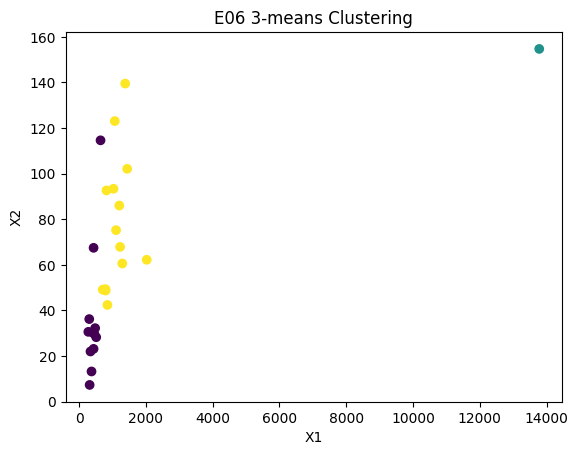

In [38]:
# Відображення кластерів на графіку
#plt.scatter(df['X1'], df['X2'], c=labels)
plt.scatter(E06.iloc[:, 0], E06.iloc[:, 1], c=nlabels)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('E06 3-means Clustering')
plt.show()

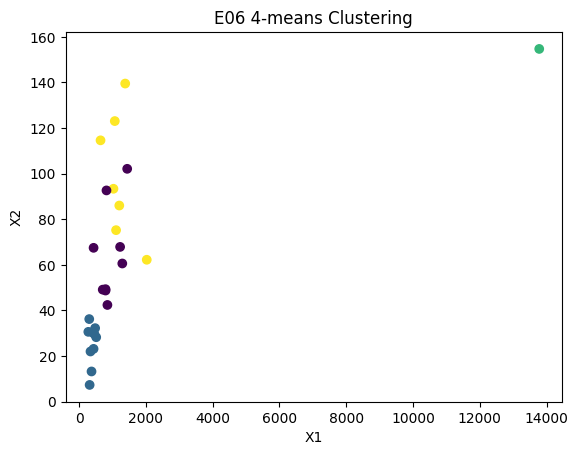

In [39]:
# Відображення кластерів на графіку
#plt.scatter(df['X1'], df['X2'], c=labels)
plt.scatter(E06.iloc[:, 0], E06.iloc[:, 1], c=mlabels)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('E06 4-means Clustering')
plt.show()

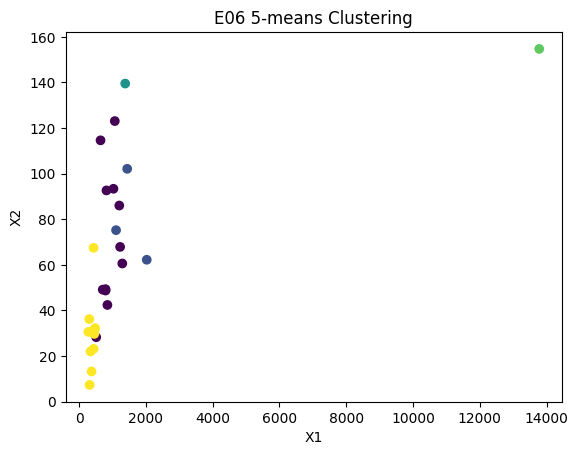

In [40]:
# Відображення кластерів на графіку
#plt.scatter(df['X1'], df['X2'], c=labels)
plt.scatter(E06.iloc[:, 0], E06.iloc[:, 1], c=ilabels)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('E06 5-means Clustering')
plt.show()

In [41]:
# Визначення кількості кластерів
n = 3
m = 4
i = 5
# Створення моделі середніх
nmeans = KMeans(n_clusters=n, n_init=10)
mmeans = KMeans(n_clusters=m, n_init=10)
imeans = KMeans(n_clusters=i, n_init=10)
# Навчання моделі на нормалізованих даних
nmeans.fit(E11_norm)
mmeans.fit(E11_norm)
imeans.fit(E11_norm)
# Передбачення кластерів для даних
nlabels = nmeans.predict(E11_norm)
mlabels = mmeans.predict(E11_norm)
ilabels = imeans.predict(E11_norm)
print(nlabels)
print(mlabels)
print(ilabels)

[2 0 0 0 0 2 2 0 2 0 0 2 2 0 0 2 2 1 0 0 2 0 2 2 2 0 0]
[1 0 2 0 0 1 1 0 0 0 0 1 1 0 0 1 1 3 0 0 1 0 1 1 1 0 0]
[1 4 0 2 4 1 1 4 1 4 2 2 1 4 4 1 1 3 2 2 1 2 1 1 1 2 4]


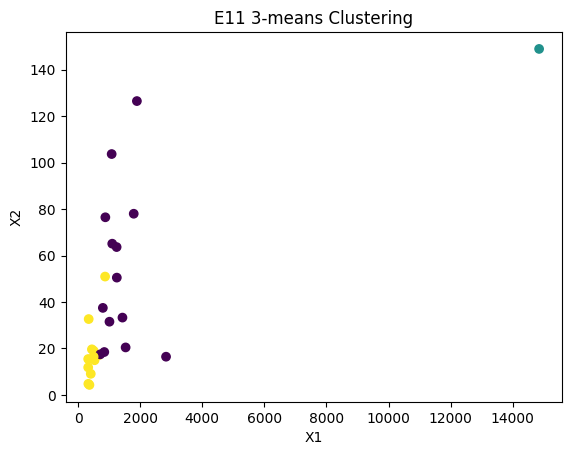

In [45]:
# Відображення кластерів на графіку
#plt.scatter(df['X1'], df['X2'], c=labels)
plt.scatter(E11.iloc[:, 0], E11.iloc[:, 1], c=nlabels)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('E11 3-means Clustering')
plt.show()

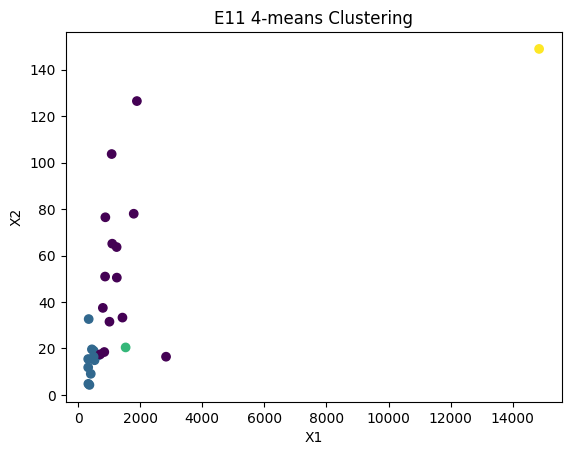

In [44]:
# Відображення кластерів на графіку
#plt.scatter(df['X1'], df['X2'], c=labels)
plt.scatter(E11.iloc[:, 0], E11.iloc[:, 1], c=mlabels)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('E11 4-means Clustering')
plt.show()

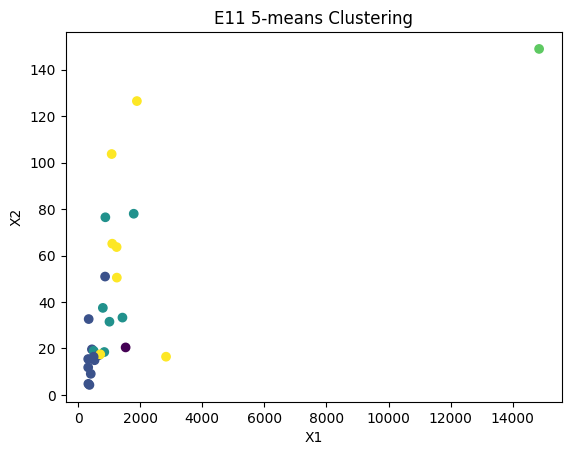

In [46]:
# Відображення кластерів на графіку
#plt.scatter(df['X1'], df['X2'], c=labels)
plt.scatter(E11.iloc[:, 0], E11.iloc[:, 1], c=ilabels)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('E11 5-means Clustering')
plt.show()